<a href="https://colab.research.google.com/github/omarmoh26/BE-Alert/blob/main/1st_Version_SRS_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/EEG_data.csv')

In [5]:
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [6]:
NewData =pd.DataFrame(columns=['SubjectID', 'VideoID', 'Attention_mean','Attention_median','Attention_mode','Attention_range','Attention_std','Attention_var','Attention_IQR','Theta_mean','Theta_median','Theta_mode','Theta_range','Theta_std','Theta_var','Theta_IQR', 'Alpha1_mean','Alpha1_median','Alpha1_mode','Alpha1_range','Alpha1_std','Alpha1_var','Alpha1_IQR', 'Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR'])

In [7]:
NewData

,SubjectID,VideoID,Attention_mean,Attention_median,Attention_mode,Attention_range,Attention_std,Attention_var,Attention_IQR,Theta_mean,...,Alpha1_std,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR


In [8]:
myData=data[['SubjectID','VideoID','Attention','Theta','Alpha1','Alpha2']]
myData.sort_values(by=['SubjectID', 'VideoID']);

In [9]:
myData.head()

,SubjectID,VideoID,Attention,Theta,Alpha1,Alpha2
0,0.0,0.0,56.0,90612.0,33735.0,23991.0
1,0.0,0.0,40.0,28083.0,1439.0,2240.0
2,0.0,0.0,47.0,383745.0,201999.0,62107.0
3,0.0,0.0,47.0,129350.0,61236.0,17084.0
4,0.0,0.0,44.0,354328.0,37102.0,88881.0


In [ ]:
for i in range(10):
  for j in range(10):
    filter1 = myData["SubjectID"] == i
    filter2 = myData["VideoID"] == j
    newdf =myData.where(filter1 & filter2, inplace = False)
    newdf=newdf.dropna()
    #Attention data
    Attmean =(newdf['Attention'].mean())
    Attmedian=(newdf['Attention'].median())
    Attmode=((newdf['Attention'].mode()).mean())
    Attrange=(newdf['Attention'].max()-newdf['Attention'].min())
    Attstd=(newdf['Attention'].std())
    Attvar=(newdf['Attention'].var())
    AttIQR=((newdf['Attention'].quantile([0.75])[0.75])-(newdf['Attention'].quantile([0.25])[0.25]))
    #Theta data
    Thetamean=(newdf['Theta'].mean())
    Thetamedian=(newdf['Theta'].median())
    Thetamode=((newdf['Theta'].mode()).mean())
    Thetarange=(newdf['Theta'].max()-newdf['Theta'].min())
    Thetastd=(newdf['Theta'].std())
    Thetavar=(newdf['Theta'].var())
    ThetaIQR=((newdf['Theta'].quantile([0.75])[0.75])-(newdf['Theta'].quantile([0.25])[0.25]))
    #Alpha1 data
    Alpha1mean=(newdf['Alpha1'].mean())
    Alpha1median=(newdf['Alpha1'].median())
    Alpha1mode=((newdf['Alpha1'].mode()).mean())
    Alpha1range=(newdf['Alpha1'].max()-newdf['Alpha1'].min())
    Alpha1std=(newdf['Alpha1'].std())
    Alpha1var=(newdf['Alpha1'].var())
    Alpha1IQR=((newdf['Alpha1'].quantile([0.75])[0.75])-(newdf['Alpha1'].quantile([0.25])[0.25]))
    #Alpha2 data
    Alpha2mean=(newdf['Alpha2'].mean())
    Alpha2median=(newdf['Alpha2'].median())
    Alpha2mode=((newdf['Alpha2'].mode()).mean())
    Alpha2range=(newdf['Alpha2'].max()-newdf['Alpha2'].min())
    Alpha2std=(newdf['Alpha2'].std())
    Alpha2var=(newdf['Alpha2'].var())
    Alpha2IQR=((newdf['Alpha2'].quantile([0.75])[0.75])-(newdf['Alpha2'].quantile([0.25])[0.25]))

    Rowdata={'SubjectID':i, 'VideoID':j, 
          'Attention_mean':Attmean,'Attention_median':Attmedian,'Attention_mode':Attmode,'Attention_range':Attrange,'Attention_std':Attstd,'Attention_var':Attvar,'Attention_IQR':AttIQR,
          'Theta_mean':Thetamean,'Theta_median':Thetamedian,'Theta_mode':Thetamode,'Theta_range':Thetarange,'Theta_std':Thetastd,'Theta_var':Thetavar,'Theta_IQR':ThetaIQR,
          'Alpha1_mean':Alpha1mean,'Alpha1_median':Alpha1median,'Alpha1_mode':Alpha1mode,'Alpha1_range':Alpha1range,'Alpha1_std':Alpha1std,'Alpha1_var':Alpha1var,'Alpha1_IQR':Alpha1IQR,
          'Alpha2_mean':Alpha2mean,'Alpha2_median':Alpha2median,'Alpha2_mode':Alpha2mode,'Alpha2_range':Alpha2range,'Alpha2_std':Alpha2std,'Alpha2_var':Alpha2var,'Alpha2_IQR':Alpha2IQR}
    NewData=NewData.append(Rowdata, ignore_index = True)
    

In [ ]:
NewData

,SubjectID,VideoID,Attention_mean,Attention_median,Attention_mode,Attention_range,Attention_std,Attention_var,Attention_IQR,Theta_mean,...,Alpha1_std,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR
0,0.0,0.0,55.256944,57.0,67.000000,87.0,22.838058,521.576875,36.5,124965.590278,...,63481.774260,4.029936e+09,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75
1,0.0,1.0,43.621429,47.0,47.000000,70.0,14.953870,223.618243,20.0,161064.228571,...,39782.071142,1.582613e+09,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00
2,0.0,2.0,43.978873,43.5,39.000000,85.0,14.095152,198.673309,15.5,149816.873239,...,48986.981274,2.399724e+09,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25
3,0.0,3.0,51.057377,52.0,69.000000,99.0,21.949717,481.790069,31.5,162653.360656,...,46917.197193,2.201223e+09,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50
4,0.0,4.0,55.224138,53.0,74.000000,99.0,21.865234,478.088456,31.0,126893.948276,...,26936.614777,7.255812e+08,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.0,5.0,49.813008,51.0,61.000000,100.0,20.175602,407.054911,24.0,282487.512195,...,117544.850540,1.381679e+10,60303.00,40760.398374,23387.0,40760.398374,396568.0,59298.736067,3.516340e+09,35767.00
96,9.0,6.0,29.620690,27.0,23.666667,55.0,12.581322,158.289655,19.0,193226.870690,...,135330.535450,1.831435e+10,65976.50,44065.681034,23556.0,44065.681034,278036.0,54258.109173,2.943942e+09,43450.50
97,9.0,7.0,27.633929,26.0,23.500000,53.0,11.180739,125.008929,14.5,137478.267857,...,59632.287707,3.556010e+09,27377.75,28570.580357,18242.5,28570.580357,180749.0,33487.308076,1.121400e+09,24441.00
98,9.0,8.0,55.548387,56.0,50.250000,90.0,19.858587,394.363493,25.0,198926.048387,...,56829.441875,3.229585e+09,40276.50,25929.185484,14637.5,25929.185484,218985.0,30583.859464,9.353725e+08,31127.50


In [ ]:
corrnewdata=NewData[['Attention_mean','Attention_median','Attention_mode','Attention_range','Attention_std','Attention_var','Attention_IQR','Theta_mean','Theta_median','Theta_mode','Theta_range','Theta_std','Theta_var','Theta_IQR']]

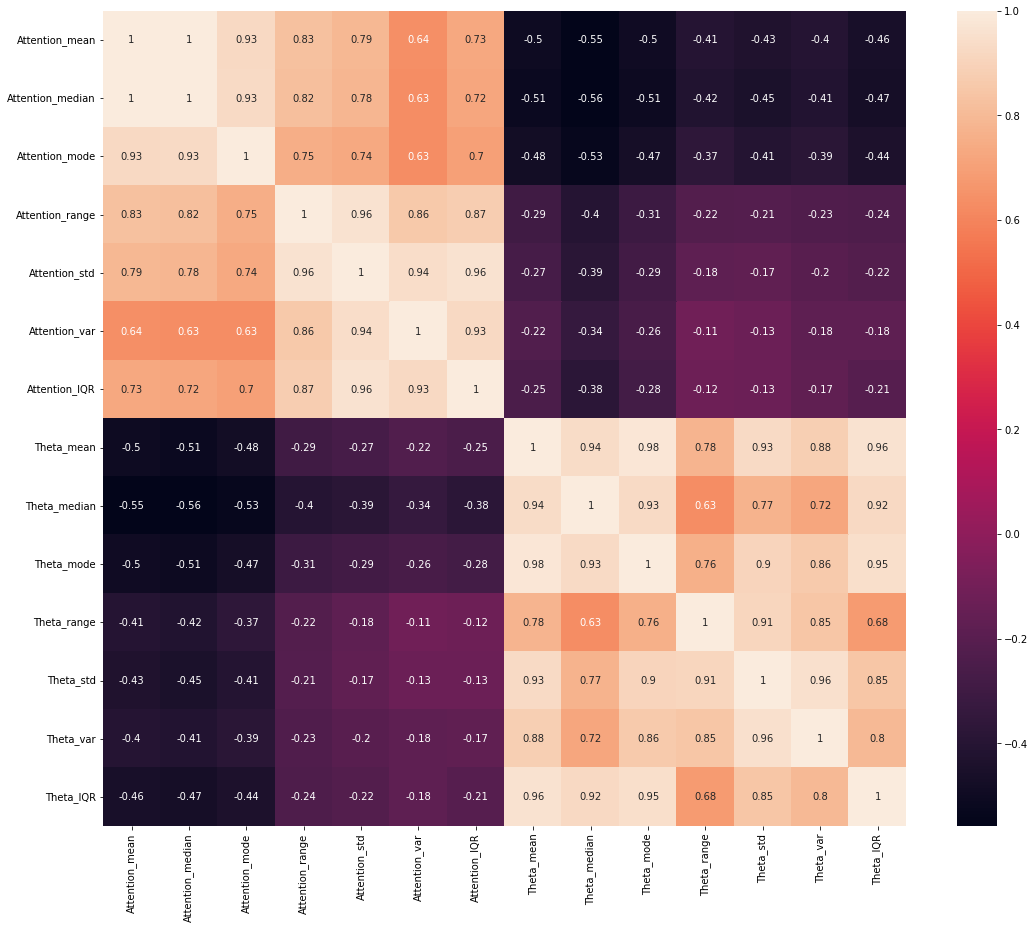

In [ ]:
corr = corrnewdata.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()
#Att Median with Theta Median
#Att Mean with Theta Median
#Att Mode with Theta Median

In [ ]:
corrnewdata=NewData[['Attention_mean','Attention_median','Attention_mode','Attention_range','Attention_std','Attention_var','Attention_IQR','Alpha1_mean','Alpha1_median','Alpha1_mode','Alpha1_range','Alpha1_std','Alpha1_var','Alpha1_IQR']]

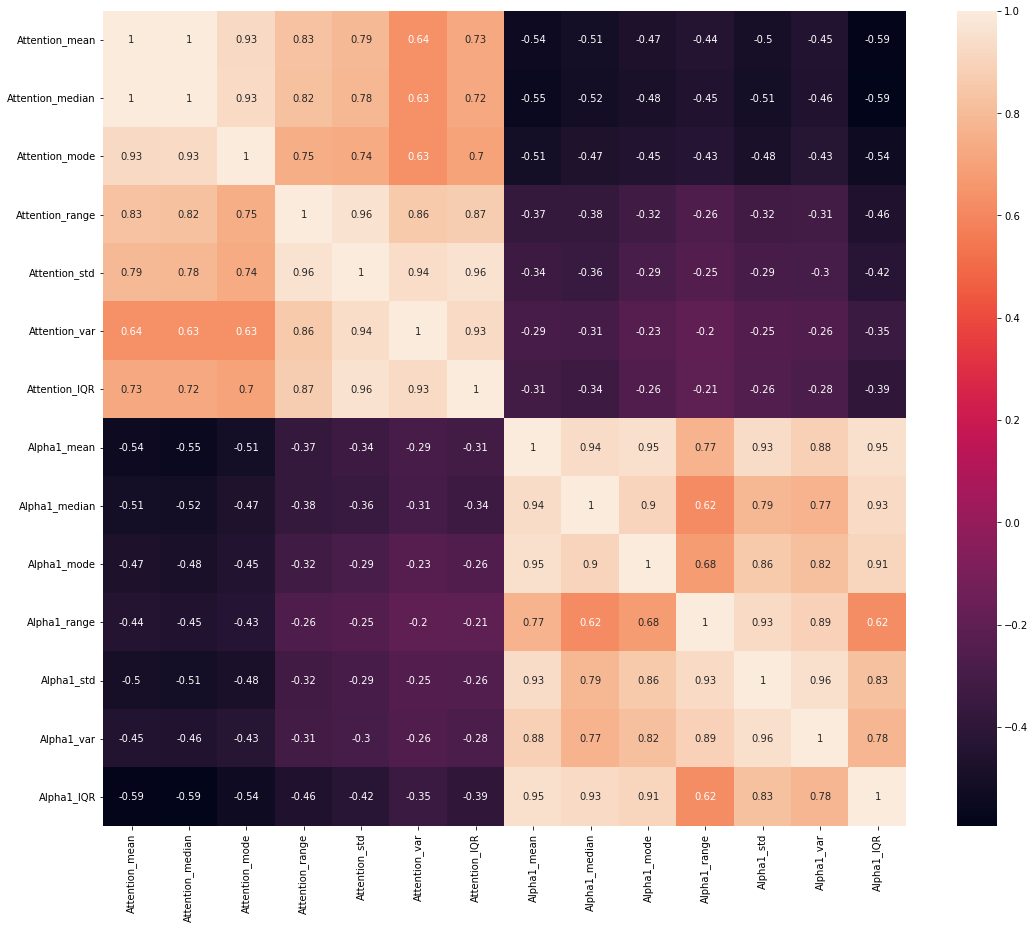

In [ ]:
corr = corrnewdata.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()
#Attention Median with Alpha1 IQR
#Attention Mean with Alpha1 IQR
#Attention Median with Alpha Mean

In [ ]:
corrnewdata=NewData[['Attention_mean','Attention_median','Attention_mode','Attention_range','Attention_std','Attention_var','Attention_IQR','Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR']]

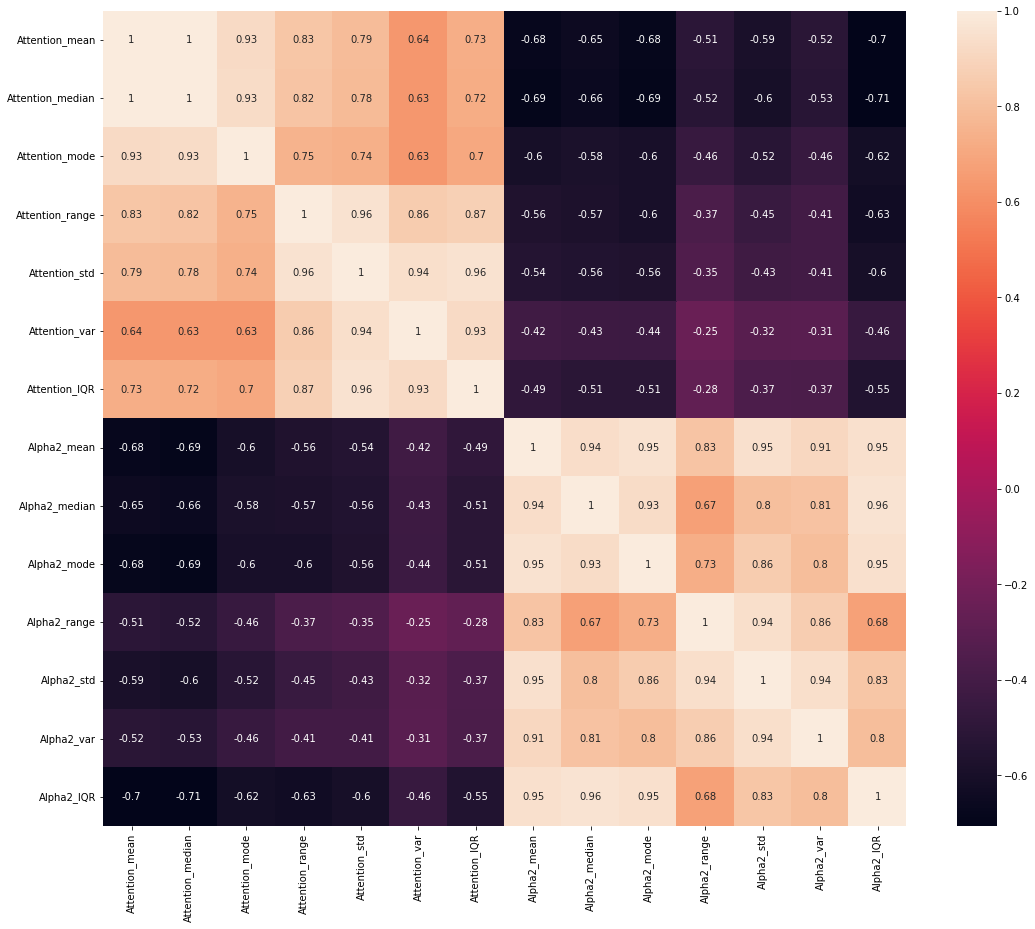

In [ ]:
corr = corrnewdata.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()
#Attention Median with Alpha2 IQR
#Attention Mean with Alpha2 IQR


In [ ]:
Final_Cloumns = NewData[['Attention_median','Theta_mean','Theta_median','Alpha1_mean','Alpha1_median','Alpha1_std','Alpha1_IQR','Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR']]

In [ ]:
Final_Cloumns

,Attention_median,Theta_mean,Theta_median,Alpha1_mean,Alpha1_median,Alpha1_std,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR
0,57.0,124965.590278,81382.5,36693.701389,13622.0,63481.774260,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75
1,47.0,161064.228571,109448.0,34918.028571,23867.5,39782.071142,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00
2,43.5,149816.873239,96455.0,30493.873239,18521.0,48986.981274,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25
3,52.0,162653.360656,64971.0,33367.278689,15899.5,46917.197193,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50
4,53.0,126893.948276,45817.5,23113.844828,14845.5,26936.614777,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51.0,282487.512195,176070.0,70498.089431,35332.0,117544.850540,60303.00,40760.398374,23387.0,40760.398374,396568.0,59298.736067,3.516340e+09,35767.00
96,27.0,193226.870690,93990.0,74629.129310,29970.5,135330.535450,65976.50,44065.681034,23556.0,44065.681034,278036.0,54258.109173,2.943942e+09,43450.50
97,26.0,137478.267857,74496.0,37676.383929,16918.5,59632.287707,27377.75,28570.580357,18242.5,28570.580357,180749.0,33487.308076,1.121400e+09,24441.00
98,56.0,198926.048387,134007.5,42279.814516,21442.0,56829.441875,40276.50,25929.185484,14637.5,25929.185484,218985.0,30583.859464,9.353725e+08,31127.50


In [ ]:
data1=NewData[['Theta_mean','Theta_median','Alpha1_mean','Alpha1_median','Alpha1_std','Alpha1_IQR','Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR']]

In [ ]:
data1

,Theta_mean,Theta_median,Alpha1_mean,Alpha1_median,Alpha1_std,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR
0,124965.590278,81382.5,36693.701389,13622.0,63481.774260,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75
1,161064.228571,109448.0,34918.028571,23867.5,39782.071142,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00
2,149816.873239,96455.0,30493.873239,18521.0,48986.981274,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25
3,162653.360656,64971.0,33367.278689,15899.5,46917.197193,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50
4,126893.948276,45817.5,23113.844828,14845.5,26936.614777,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,282487.512195,176070.0,70498.089431,35332.0,117544.850540,60303.00,40760.398374,23387.0,40760.398374,396568.0,59298.736067,3.516340e+09,35767.00
96,193226.870690,93990.0,74629.129310,29970.5,135330.535450,65976.50,44065.681034,23556.0,44065.681034,278036.0,54258.109173,2.943942e+09,43450.50
97,137478.267857,74496.0,37676.383929,16918.5,59632.287707,27377.75,28570.580357,18242.5,28570.580357,180749.0,33487.308076,1.121400e+09,24441.00
98,198926.048387,134007.5,42279.814516,21442.0,56829.441875,40276.50,25929.185484,14637.5,25929.185484,218985.0,30583.859464,9.353725e+08,31127.50


In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(data1)
print(X)

[[-0.48953219 -0.26995565 -0.19856462 ... -0.1940283  -0.33084397
  -0.25770429]
 [-0.08095119  0.20095288 -0.27247195 ... -0.41588613 -0.43288043
  -0.1675871 ]
 [-0.20825394 -0.01705551 -0.45661482 ... -0.63274302 -0.51134713
  -0.29827311]
 ...
 [-0.34790795 -0.38550362 -0.15766326 ... -0.28681507 -0.37619575
  -0.25074675]
 [ 0.3475863   0.61303454  0.03394143 ... -0.37757019 -0.41683048
  -0.00492579]
 [-0.06471541 -0.48594218  0.04398828 ...  0.25740135 -0.05527205
  -0.04859196]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

In [ ]:
silhouette_coefficients = []
  #  .tofc ..:
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(X)
     score = silhouette_score(X, kmeans.labels_)
     silhouette_coefficients.append(score)

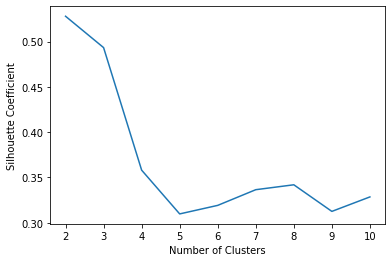

In [ ]:
%matplotlib inline
plt.figure()
# plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:


 # A list holds the SSE values for each k
 sse = []
 for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(X)
     sse.append(kmeans.inertia_)

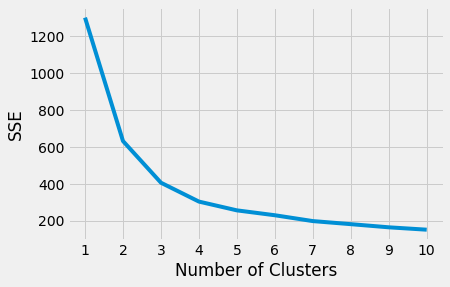

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# from google.colab import files
# NewData.to_csv('EEG_Final_Features.csv') 
# files.download('EEG_Final_Features.csv')

In [ ]:
result = []
for value in data1['Attention']:
    if value >= 50:
        result.append('1')
    else:
        result.append('0')

data1["Result"] = result  
print(data1)